https://towardsdatascience.com/beginners-guide-to-pyspark-bbe3b553b79f

In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as f

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

# where the '*' represents all the cores of the CPU.

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/09 21:07:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Reading CSV file

csv_file = 'data/stocks_price_final.csv'
df = spark.read.csv(csv_file)

# # Reading JSON file

# json_file = 'data/stocks_price_final.json'
# data = spark.read.json(json_file)

# # Reading parquet file

# parquet_file = 'data/stocks_price_final.parquet'
# data1 = spark.read.parquet(parquet_file)


In [5]:
# Before structuring schema

data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep = ',',
    header = True,
    )

data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [6]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc 
    )

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [7]:
data.schema

StructType([StructField('_c0', IntegerType(), True), StructField('symbol', StringType(), True), StructField('data', DateType(), True), StructField('open', DoubleType(), True), StructField('high', DoubleType(), True), StructField('low', DoubleType(), True), StructField('close', DoubleType(), True), StructField('volume', IntegerType(), True), StructField('adjusted', DoubleType(), True), StructField('market.cap', StringType(), True), StructField('sector', StringType(), True), StructField('industry', StringType(), True), StructField('exchange', StringType(), True)])

In [8]:
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('data', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market.cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [9]:
data.head(3)

23/07/09 21:08:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv


[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [11]:
df.show(2)

+----+------+----------+----+----+---+-----+-------+--------+----------+-------------+--------------------+--------+
| _c0|   _c1|       _c2| _c3| _c4|_c5|  _c6|    _c7|     _c8|       _c9|         _c10|                _c11|    _c12|
+----+------+----------+----+----+---+-----+-------+--------+----------+-------------+--------------------+--------+
|null|symbol|      date|open|high|low|close| volume|adjusted|market.cap|       sector|            industry|exchange|
|   1|   TXG|2019-09-12|  54|  58| 51|52.75|7326300|   52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+----+------+----------+----+----+---+-----+-------+--------+----------+-------------+--------------------+--------+
only showing top 2 rows



In [17]:
df.describe().show()

23/06/29 15:03:37 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+-------+----------+------------------+------------------+------------------+------------------+-----------------+------------------+----------+----------------+--------------------+--------+
|summary|              _c0|    _c1|       _c2|               _c3|               _c4|               _c5|               _c6|              _c7|               _c8|       _c9|            _c10|                _c11|    _c12|
+-------+-----------------+-------+----------+------------------+------------------+------------------+------------------+-----------------+------------------+----------+----------------+--------------------+--------+
|  count|          1729034|1729035|   1729035|           1729035|           1729035|           1729035|           1729035|          1729035|           1729035|   1729035|         1729035|             1729035| 1729035|
|   mean|         864517.5|   null|      null|15070.071703341047| 15555.06726813709|14557.808227578987|15032.714854330708|139710

In [18]:
data.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

In [19]:
data.count()

1729034

In [21]:
data = data.withColumn('date', data.data)

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

23/06/29 15:05:31 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv


In [22]:
data = data.withColumnRenamed('date', 'data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|data_changed|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital 

23/06/29 15:05:53 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv


In [23]:
data = data.drop('data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

23/06/29 15:06:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv


In [45]:
# Remove Rows with Missing Values

data.na.drop()

# Replacing Missing Values with Mean

data.na.fill(data.select(f.mean(data['open'])).collect()[0][0])

# Replacing Missing Values with new values

data.na.replace(old_value, new_vallue)

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `market`.`cap` cannot be resolved. Did you mean one of the following? [`_c0`, `symbol`, `data`, `open`, `high`, `low`, `close`, `volume`, `adjusted`, `market`.`cap`, `sector`, `industry`, `exchange`].

In [25]:
## Selecting Single Column

data.select('sector').show(5)

## Selecting Multiple columns

data.select(['open', 'close', 'adjusted']).show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



In [26]:
from pyspark.sql.functions import col, lit

data.filter( (col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31')) ).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

23/06/29 15:06:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv


In [27]:
## fetch the data where the adjusted value is between 100.0 and 500.0

data.filter(data.adjusted.between(100.0, 500.0)).show()

23/06/29 15:07:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv


+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| _c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market.cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|

In [44]:
data.select('open', 'close', 
            f.when(data.adjusted >= 200.0, 1).otherwise(0)
           ).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



In [29]:
data.select('sector', 
            data.sector.rlike('^[B,C]').alias('Sector Starting with B or C')
            ).distinct().show()

+--------------------+---------------------------+
|              sector|Sector Starting with B or C|
+--------------------+---------------------------+
|         Health Care|                      false|
|       Capital Goods|                       true|
|Consumer Non-Dura...|                       true|
|    Public Utilities|                      false|
|   Consumer Durables|                       true|
|             Finance|                      false|
|      Transportation|                      false|
|       Miscellaneous|                      false|
|   Consumer Services|                       true|
|              Energy|                      false|
|    Basic Industries|                       true|
|          Technology|                      false|
+--------------------+---------------------------+



In [30]:
data.select([
             'industry', 
             'open', 
             'close', 
             'adjusted'
            ]
            ).groupBy('industry')\
            .mean()\
            .show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714288| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938775|16.359879090306126|16.148959322959186|
|Investment Banker...| 58.95058094575025|58.983085960826216| 58.15783725890321|
|        Broadcasting| 24.91678746482518|24.917388455395137| 24.69910202962529|
|Agricultural Chem...|22.046413928996607|22.042051076318018|21.635093418154753|
|Biotechnology: Bi...| 24.80808319232425| 24.80358714993552| 24.74507997827328|
|Other Specialty S...| 84.80718810562861| 84.80276550929827| 84.55525036482356|
|Biotechnology: El...| 33.36891734535046| 33.33611913546897| 33.21022605613576|
|Other Consumer Se...| 43.67010744224601|43.658688711464734|43.434989808790114|
|Electric Utilitie...| 41.35569183903101

In [46]:
data.filter( (col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')) )\
    .groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 
         avg("open").alias("Average Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"), 
         avg("close").alias("Average Closing"), 

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 
         avg("adjusted").alias("Average Adjusted Closing"), 

      ).show(truncate=False)

AttributeError: 'str' object has no attribute 'alias'

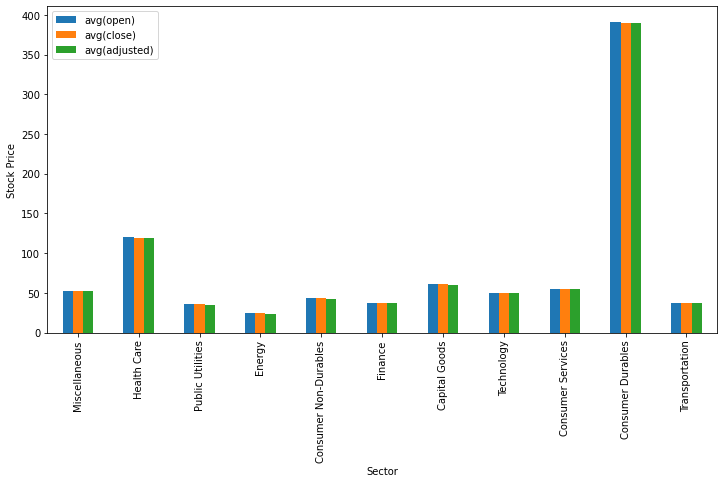

In [38]:
sec_df =  data.select(['sector', 
                       'open', 
                       'close', 
                       'adjusted']
                     )\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()

ind = list(range(12))

ind.pop(6)

sec_df.iloc[ind ,:].plot(kind = 'bar', x='sector', y = sec_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel = 'Stock Price', xlabel = 'Sector')
plt.show()

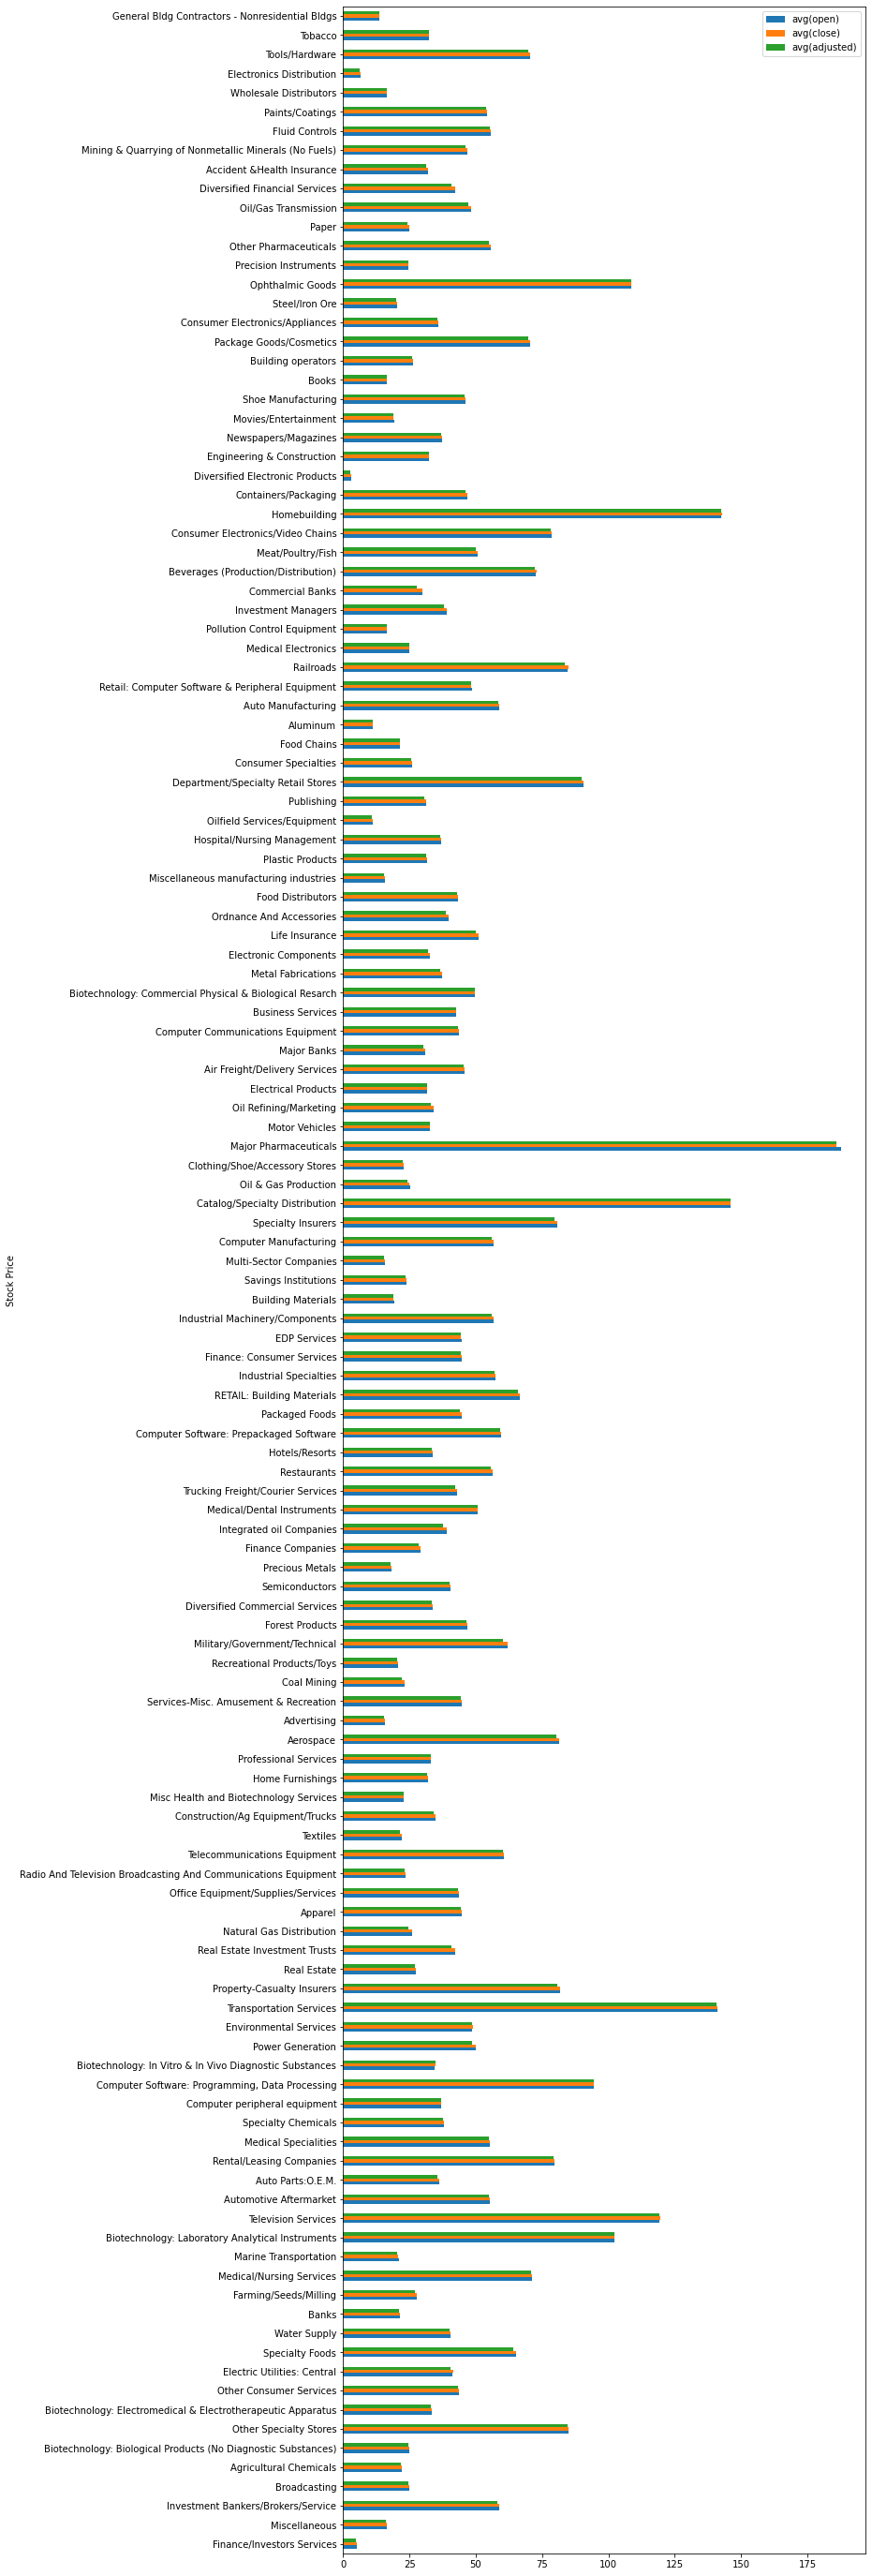

In [37]:
industries_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()

q  = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]

q.plot(kind = 'barh', x='industry', y = q.columns.tolist()[1:], figsize=(10, 50), xlabel='Stock Price', ylabel = 'Industry')

plt.show()

23/06/29 15:14:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: date, open, close, adjusted, sector
 Schema: data, open, close, adjusted, sector
Expected: data but found: date
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv
23/06/29 15:14:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: date, open, close, adjusted, sector
 Schema: data, open, close, adjusted, sector
Expected: data but found: date
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv
23/06/29 15:15:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: date, open, close, adjusted, sector
 Schema: data, open, close, adjusted, sector
Expected: data but found: date
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv


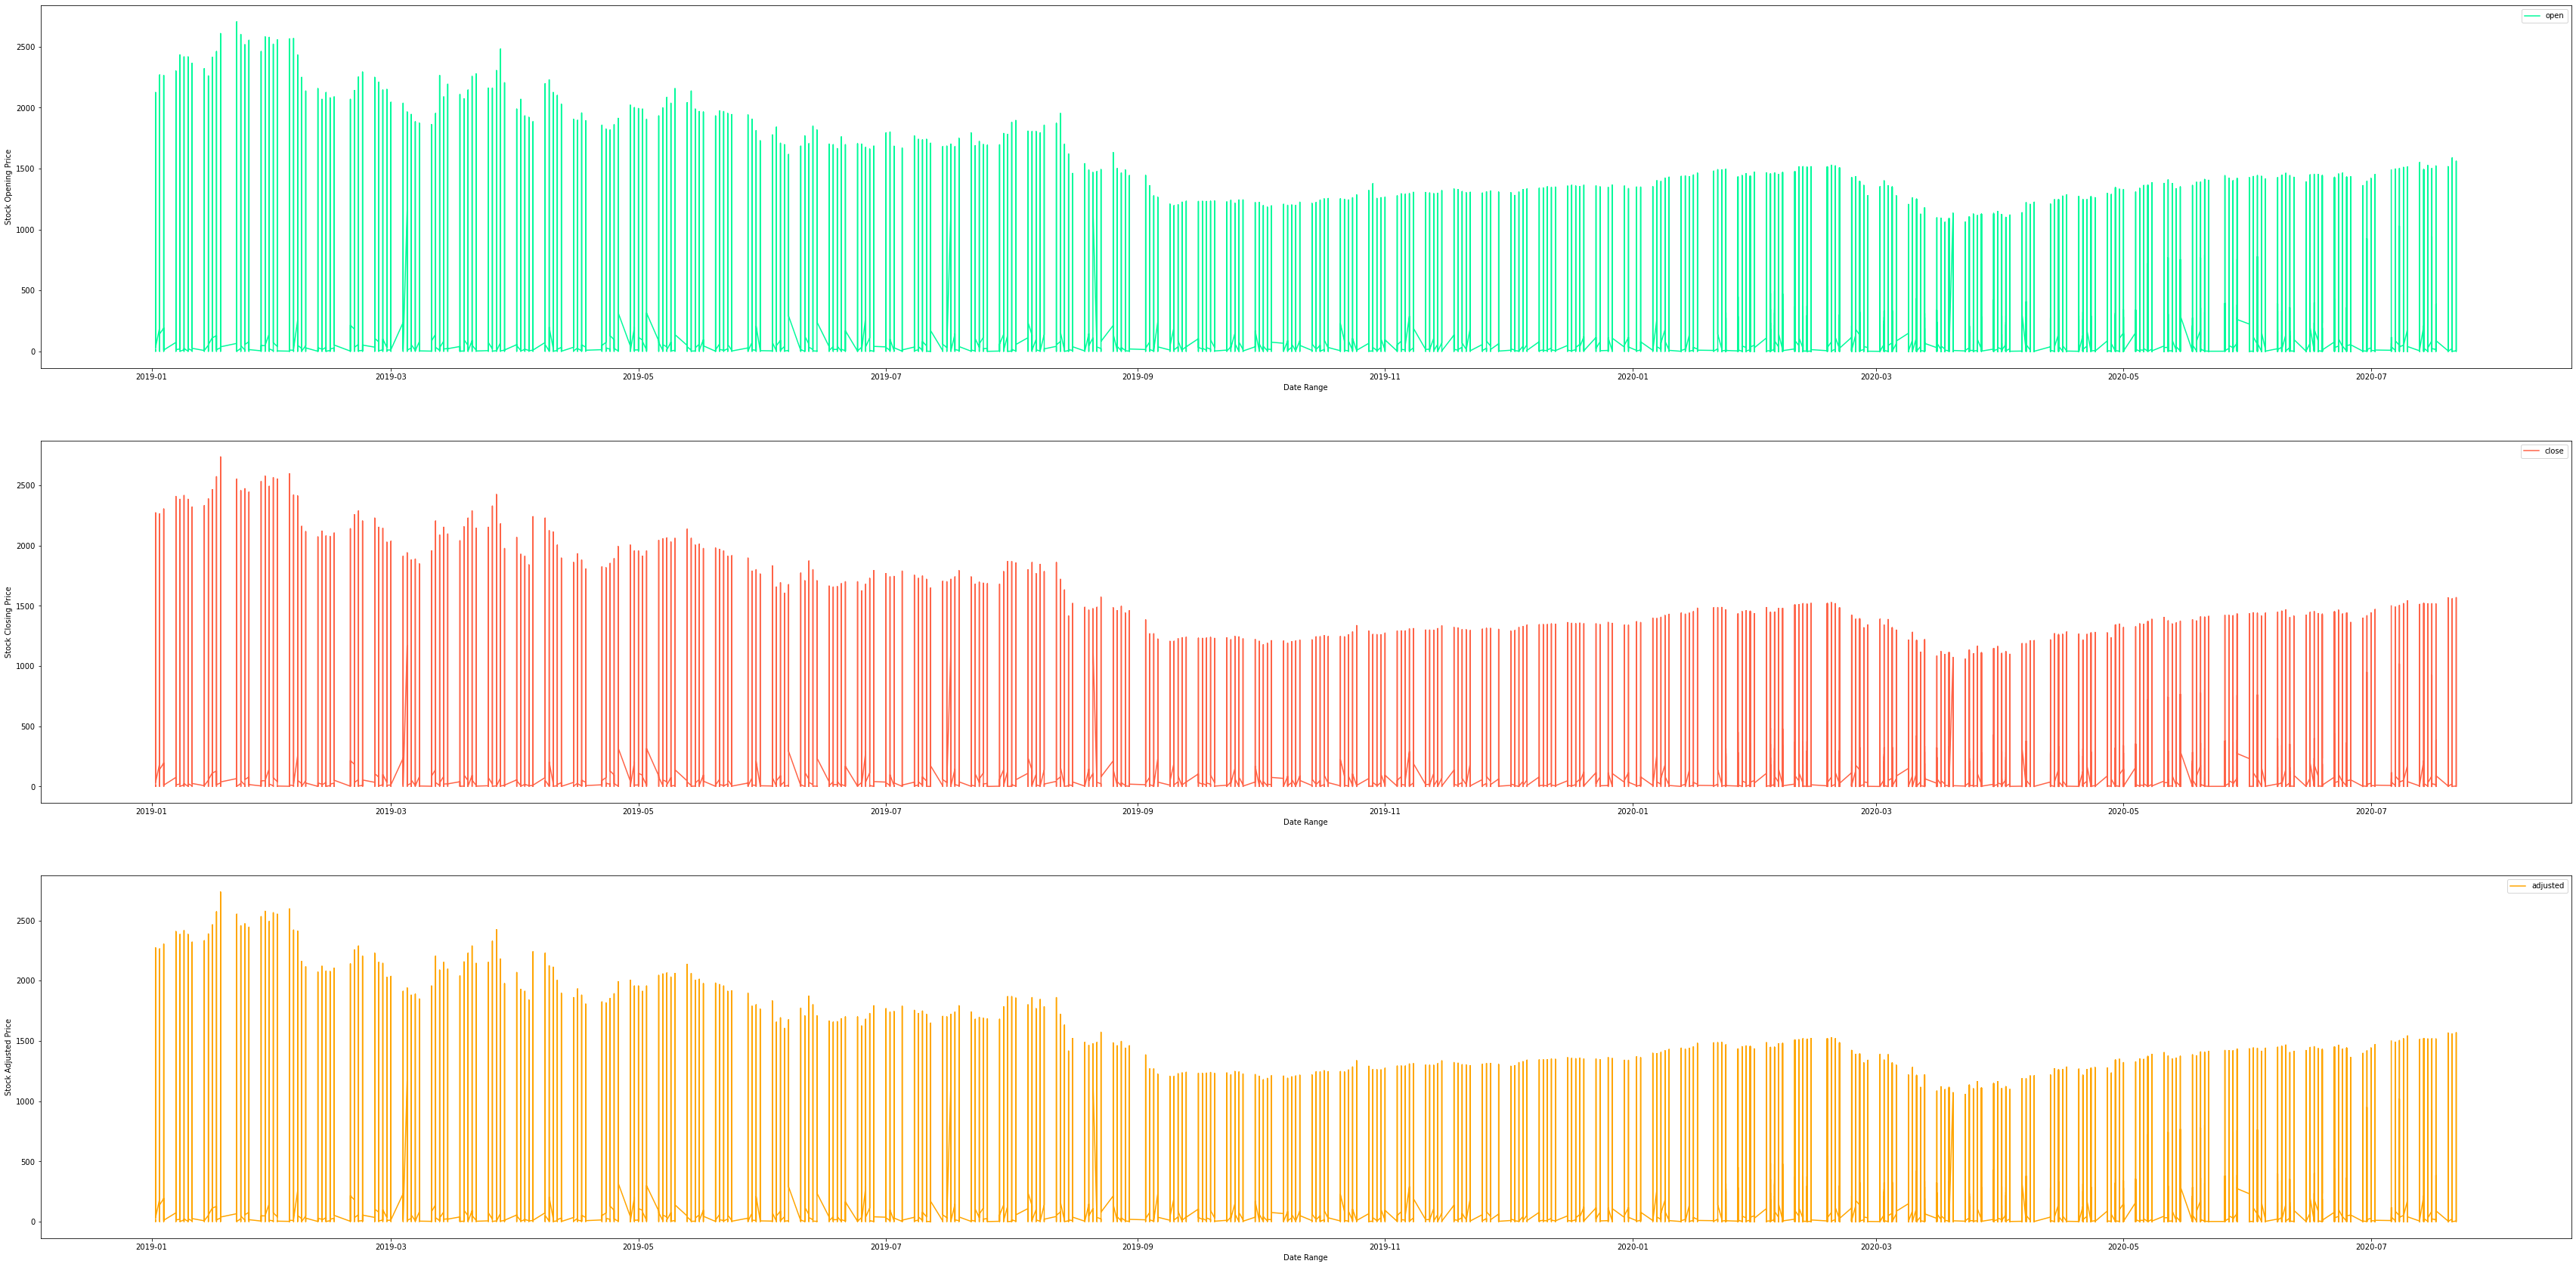

In [36]:
from pyspark.sql.functions import col

tech = data.where(col('sector') == 'Technology')\
           .select('data', 'open', 'close', 'adjusted')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(60, 30))

tech.toPandas().plot(kind = 'line', x = 'data', y='open', 
                     xlabel = 'Date Range', ylabel = 'Stock Opening Price', 
                     ax = axes[0], color = 'mediumspringgreen')

tech.toPandas().plot(kind = 'line', x = 'data', y='close',
                     xlabel = 'Date Range', ylabel = 'Stock Closing Price',
                     ax = axes[1], color = 'tomato')

tech.toPandas().plot(kind = 'line', x = 'data', y='adjusted', 
                     xlabel = 'Date Range', ylabel = 'Stock Adjusted Price', 
                     ax = axes[2], color = 'orange')

plt.show()

In [40]:
## Writing entire data to different file formats

# CSV
data.write.csv('dataset.csv')

# # JSON
# data.write.save('dataset.json', format='json')

# # Parquet
# data.write.save('dataset.parquet', format='parquet')

# ## Writing selected data to different file formats

# # CSV
# data.select(['data', 'open', 'close', 'adjusted'])\
#             .write.csv('dataset.csv')

# # JSON
# data.select(['data', 'open', 'close', 'adjusted'])\
#     .write.save('dataset.json', format='json')

# # Parquet
# data.select(['data', 'open', 'close', 'adjusted'])\
#     .write.save('dataset.parquet', format='parquet')

23/06/29 15:15:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/leiyu/Projects/pyspark-demo/data/stocks_price_final.csv


## PySpark Join Types / Join Two DataFrames

https://sparkbyexamples.com/pyspark/pyspark-join-explained-with-examples/?expand_article=1

In [12]:
emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)

dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)


root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+------+

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



#### PySpark Inner Join DataFrame

In [13]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner") \
     .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



#### PySpark Full Outer Join

In [14]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"outer") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"full") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"fullouter") \
    .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+-

In [15]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"left") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftouter") \
   .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|n

In [16]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"right") \
   .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"rightouter") \
   .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|n

### get all associates

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Start SparkSession
spark = SparkSession.builder.appName("managerHierarchyExample3").getOrCreate()

# Save them in a list or other data structure
sessions = [spark]

# Now you can iterate over your SparkSessions
for session in sessions:
    print(session.sparkContext.appName)
    
# Create DataFrame
data = [("John", "Doe"), ("Jane", "Smith"), ("Mary", "Doe"), 
        ("Mike", "Johnson"), ("Lisa", "Smith"), ("Doe", "Johnson"), 
        ("Emma", "Doe"), ("Jack", "Jane")]
df = spark.createDataFrame(data, ["Associate_Name", "Manager_Name"])
df.show()

managerExample
+--------------+------------+
|Associate_Name|Manager_Name|
+--------------+------------+
|          John|         Doe|
|          Jane|       Smith|
|          Mary|         Doe|
|          Mike|     Johnson|
|          Lisa|       Smith|
|           Doe|     Johnson|
|          Emma|         Doe|
|          Jack|        Jane|
+--------------+------------+



In [6]:
def find_all_associates(df, manager_name):
    # Initial dataframe for the specific manager
    base = df.filter(df.Manager_Name == manager_name)
    name_list = base.select('Associate_Name').distinct().rdd.flatMap(list).collect()

    while True:
        # Get the associates who report to the managers found in the previous step
        level = df.filter(col('Manager_Name').isin(*name_list))
        level_name_list = level.select('Associate_Name').distinct().rdd.flatMap(list).collect()
        
        # Remove duplicates
        new_name_list = name_list + list(set(level_name_list)-set(name_list))

        # If the number of associates does not increase, then stop
        if len(new_name_list) == len(name_list):
            break
        else:
            name_list = new_name_list
            
    return df.filter(col('Associate_Name').isin(*name_list))

In [7]:
# Get all associates reporting to a specific manager
manager_name = "Johnson"
all_associates_df = find_all_associates(df, manager_name)

# Show the dataframe
all_associates_df.show()

+--------------+------------+
|Associate_Name|Manager_Name|
+--------------+------------+
|          John|         Doe|
|          Mary|         Doe|
|          Mike|     Johnson|
|           Doe|     Johnson|
|          Emma|         Doe|
+--------------+------------+

